<a href="https://colab.research.google.com/github/lweatherford99/AIML-Projects/blob/main/High_Code_Plant_Seedling_ClassificationTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Computer Vision: Plant Seedlings Classification

## Problem Statement

### Context

In recent times, the field of agriculture has been in urgent need of modernizing, since the amount of manual work people need to put in to check if plants are growing correctly is still highly extensive. Despite several advances in agricultural technology, people working in the agricultural industry still need to have the ability to sort and recognize different plants and weeds, which takes a lot of time and effort in the long term. The potential is ripe for this trillion-dollar industry to be greatly impacted by technological innovations that cut down on the requirement for manual labor, and this is where Artificial Intelligence can actually benefit the workers in this field, as **the time and energy required to identify plant seedlings will be greatly shortened by the use of AI and Deep Learning.** The ability to do so far more efficiently and even more effectively than experienced manual labor, could lead to better crop yields, the freeing up of human inolvement for higher-order agricultural decision making, and in the long term will result in more sustainable environmental practices in agriculture as well.


### Objective

The aim of this project is to Build a Convolutional Neural Netowrk to classify plant seedlings into their respective categories.

### Data Dictionary

The Aarhus University Signal Processing group, in collaboration with the University of Southern Denmark, has recently released a dataset containing **images of unique plants belonging to 12 different species.**

- The dataset can be download from Olympus.
- The data file names are:
    - images.npy
    - Label.csv
- Due to the large volume of data, the images were converted to the images.npy file and the labels are also put into Labels.csv, so that you can work on the data/project seamlessly without having to worry about the high data volume.

- The goal of the project is to create a classifier capable of determining a plant's species from an image.

**List of Species**

- Black-grass
- Charlock
- Cleavers
- Common Chickweed
- Common Wheat
- Fat Hen
- Loose Silky-bent
- Maize
- Scentless Mayweed
- Shepherds Purse
- Small-flowered Cranesbill
- Sugar beet

####**Note: Please use GPU runtime to execute the code efficiently**

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import ReduceLROnPlateau

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

## Loading the dataset

In [2]:
# Mount Google drive to access the dataset
# Run the below code if you using google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load the labels data
labels_df = pd.read_csv("/content/drive/MyDrive/Projects/Project8/Labels.csv")

# Load the images data
images = np.load("/content/drive/MyDrive/Projects/Project8/plant_images.npy", allow_pickle=True)

In [4]:
labels_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   4750 non-null   object
dtypes: object(1)
memory usage: 37.2+ KB


In [5]:
unique_labels = labels_df['Label'].unique()  # Assuming the column name is 'labels'
print(unique_labels[:25])  # Display the first 25 unique labels

['Small-flowered Cranesbill' 'Fat Hen' 'Shepherds Purse' 'Common wheat'
 'Common Chickweed' 'Charlock' 'Cleavers' 'Scentless Mayweed' 'Sugar beet'
 'Maize' 'Black-grass' 'Loose Silky-bent']


## Data Overview

- Define the problem statement - Read the dataset properly - Check the shape of the data

### Understand the shape of the dataset

In [6]:
print ("Shape of the Labels Dataset:", labels_df.shape)
print ("Shape of the Images Dataset:", images.shape)

Shape of the Labels Dataset: (4750, 1)
Shape of the Images Dataset: (4750, 128, 128, 3)


In [7]:
labels_df.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


## Exploratory Data Analysis
Perform an Exploratory Data Analysis and get the insights on the images
- Plot random images from each of the classes and print their corresponding labels. - Count Plot for each category - Key meaningful observations from EDA

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you understand the data better.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

1. How are these different category plant images different from each other?
2. Is the dataset provided an imbalance? (Check with using bar plots)

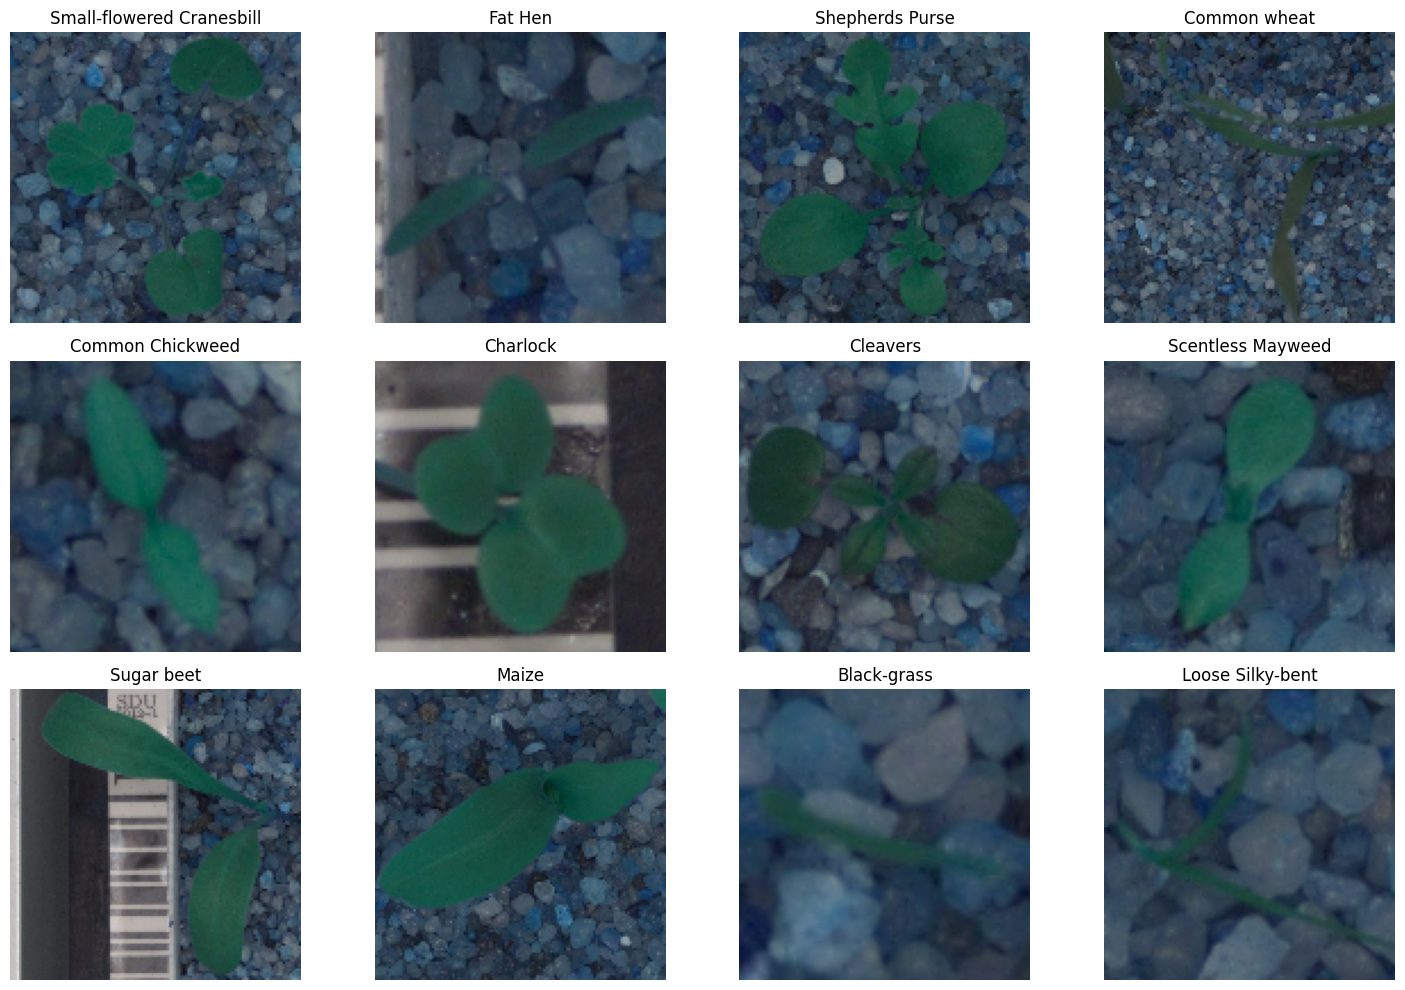

In [8]:
# Setting the seed for reproducibility
random.seed(42)

# Unique labels
unique_labels = labels_df['Label'].unique()

# Plotting random images from each class
plt.figure(figsize=(15, 10))
for i, label in enumerate(unique_labels, 1):
    plt.subplot(3, 4, i)

    # Get random index of the given label
    random_index = random.choice(labels_df[labels_df['Label'] == label].index)

    plt.imshow(images[random_index])
    plt.title(label)
    plt.axis('off')

plt.tight_layout()
plt.show()

Here are random images from each of the 12 plant species. This gives us a visual idea about the variety of images we're dealing with, and we can observe the following:

1. **Variability in Color and Texture:** Different species have distinct colors and textures which will aid in classification.

2. **Presence of Background:** Some images have noticeable backgrounds (like soil). The model might need to learn to focus on the plant and ignore the background for accurate classification.

3. **Diverse Shapes:** The shapes of the plants vary significantly, providing another distinguishing feature.

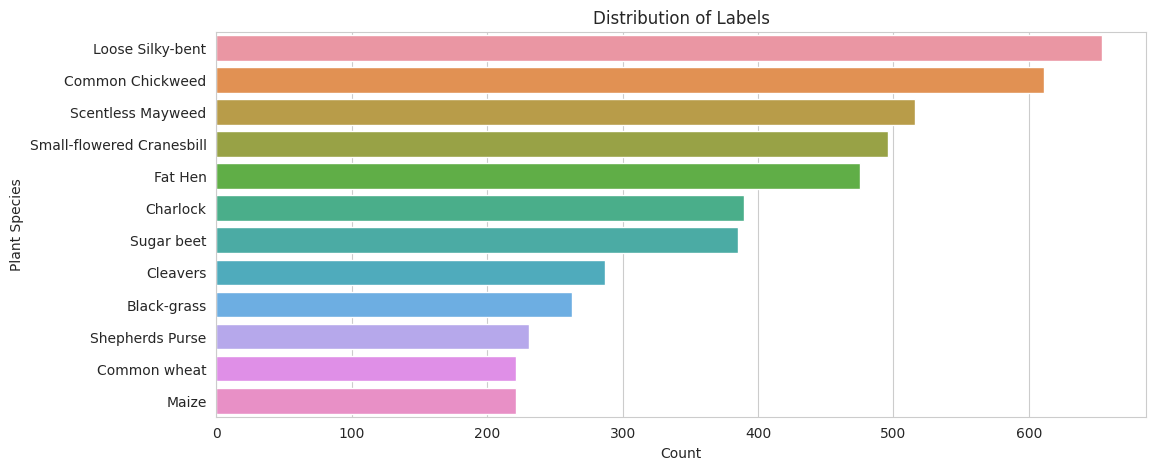

In [9]:
# Setting the style for better visualization
sns.set_style("whitegrid")

# Creating a count plot for label distribution
plt.figure(figsize=(12, 5))
sns.countplot(y=labels_df['Label'], order=labels_df['Label'].value_counts().index)
plt.title('Distribution of Labels')
plt.xlabel('Count')
plt.ylabel('Plant Species')
plt.show()

## Key Observations from the EDA:

**1. Class Imbalance:**
The dataset exhibits a clear class imbalance. "Loose Silky-bent" and "Common Chickweed" have the highest number of images, while "Maize" and "Common Wheat" are among the species with the fewest images. This imbalance can influence the model's performance, and we might need to consider techniques like data augmentation, oversampling, or adjusting class weights during training to mitigate this.

**2. Variability in Visual Features:**
As observed from the sample images, different species have distinct colors, textures, and shapes. These visual features will be pivotal for the model to differentiate between the classes.

**3. Presence of Background:**
Some images have non-uniform backgrounds that might act as noise. Preprocessing techniques, such as segmentation, might help in emphasizing the plant and reducing the background noise.

**4. Diverse Data:**
The dataset seems to have a good mix of images in terms of the plant's age, lighting conditions, and orientations. This diversity can help in training a robust model.

Now that we've performed the EDA and have a better understanding of our data, we can proceed with further preprocessing, model building, and training. Let me know how you'd like to proceed!


## Data Pre-Processing
- Convert the BGR images to RGB images - Resize the images - Plot the images before and after the pre-processing steps - Split the data into train and test - Encode the target variables - Apply the normalization

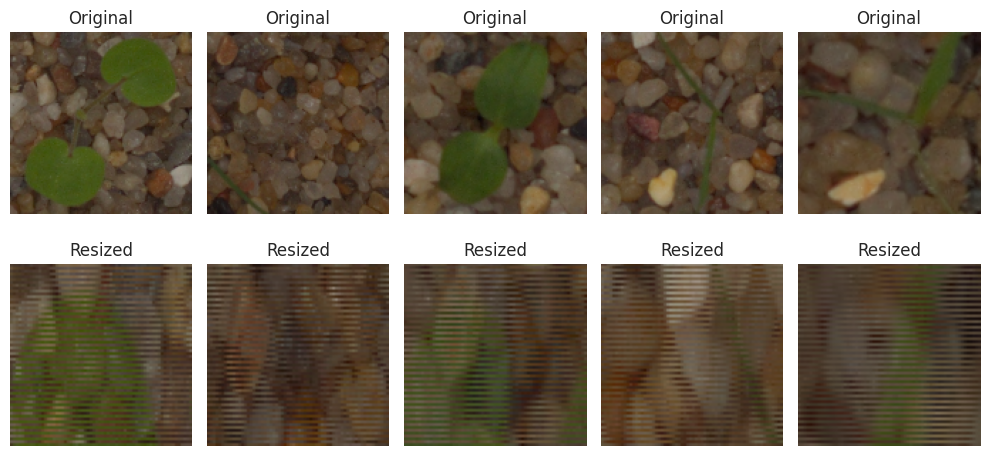

In [10]:
# 1. Convert BGR images to RGB
rgb_images = images[:, :, :, ::-1]

# 2. Resize images
desired_size = (64, 64)
resized_images = np.array([np.resize(img, desired_size + (3,)) for img in rgb_images])

# 3. Plot images before and after pre-processing
sample_indices = [np.random.choice(range(len(images))) for _ in range(5)]
plt.figure(figsize=(10, 5))

for i, idx in enumerate(sample_indices, 1):
    # Original image
    plt.subplot(2, 5, i)
    plt.imshow(rgb_images[idx])
    plt.title("Original")
    plt.axis("off")

    # Resized image
    plt.subplot(2, 5, i + 5)
    plt.imshow(resized_images[idx])
    plt.title("Resized")
    plt.axis("off")

plt.tight_layout()
plt.show()

# 4. Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(resized_images, labels_df['Label'].values, test_size=0.2, random_state=42)

# 5. Encode the target variables
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert integers to one-hot encoded labels
y_train_onehot = to_categorical(y_train_encoded)
y_test_onehot = to_categorical(y_test_encoded)

# 6. Apply normalization
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

### Convert the BGR images to RGB images.

In [11]:
# 1. Convert BGR images to RGB
rgb_images = images[:, :, :, ::-1]

### Resize the images

As the size of the images is large, it may be computationally expensive to train on these larger images; therefore, it is preferable to reduce the image size from 128 to 64.

In [12]:
# 2. Resize images
desired_size = (64, 64)
resized_images = np.array([np.resize(img, desired_size + (3,)) for img in rgb_images])

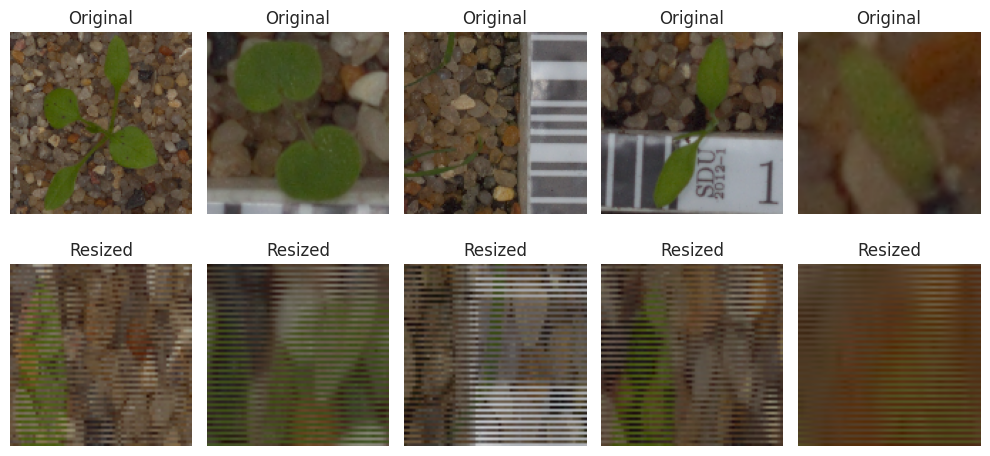

In [13]:
# 3. Plot images before and after pre-processing
sample_indices = [np.random.choice(range(len(images))) for _ in range(5)]
plt.figure(figsize=(10, 5))

for i, idx in enumerate(sample_indices, 1):
    # Original image
    plt.subplot(2, 5, i)
    plt.imshow(rgb_images[idx])
    plt.title("Original")
    plt.axis("off")

    # Resized image
    plt.subplot(2, 5, i + 5)
    plt.imshow(resized_images[idx])
    plt.title("Resized")
    plt.axis("off")

plt.tight_layout()
plt.show()

### Data Preparation for Modeling

- Before you proceed to build a model, you need to split the data into train, test, and validation to be able to evaluate the model that you build on the train data
- You'll have to encode categorical features and scale the pixel values.
- You will build a model using the train data and then check its performance

**Split the dataset**

In [14]:
# 4. Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(resized_images, labels_df['Label'].values, test_size=0.2, random_state=42)

### Encode the target labels

In [15]:
# 5. Encode the target variables
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [16]:
# Convert integers to one-hot encoded labels
y_train_onehot = to_categorical(y_train_encoded)
y_test_onehot = to_categorical(y_test_encoded)

### Data Normalization

In [17]:
# 6. Apply normalization
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

## Model Building
- Build Convolution Neural Network - Evaluate the model on different performance metrics and comment on the performance. For example precision, recall, accuracy. - Plot confusion matrix

30/30 [==============================] - 0s 2ms/step
                           precision    recall  f1-score   support

              Black-grass       0.18      0.17      0.18        47
                 Charlock       0.47      0.64      0.54        76
                 Cleavers       0.60      0.55      0.57        62
         Common Chickweed       0.58      0.68      0.63       102
             Common wheat       0.14      0.16      0.15        38
                  Fat Hen       0.31      0.33      0.32        94
         Loose Silky-bent       0.41      0.52      0.45       141
                    Maize       0.35      0.14      0.20        42
        Scentless Mayweed       0.44      0.27      0.33       105
          Shepherds Purse       0.52      0.29      0.37        56
Small-flowered Cranesbill       0.62      0.56      0.59       114
               Sugar beet       0.37      0.45      0.41        73

                 accuracy                           0.44       950
       

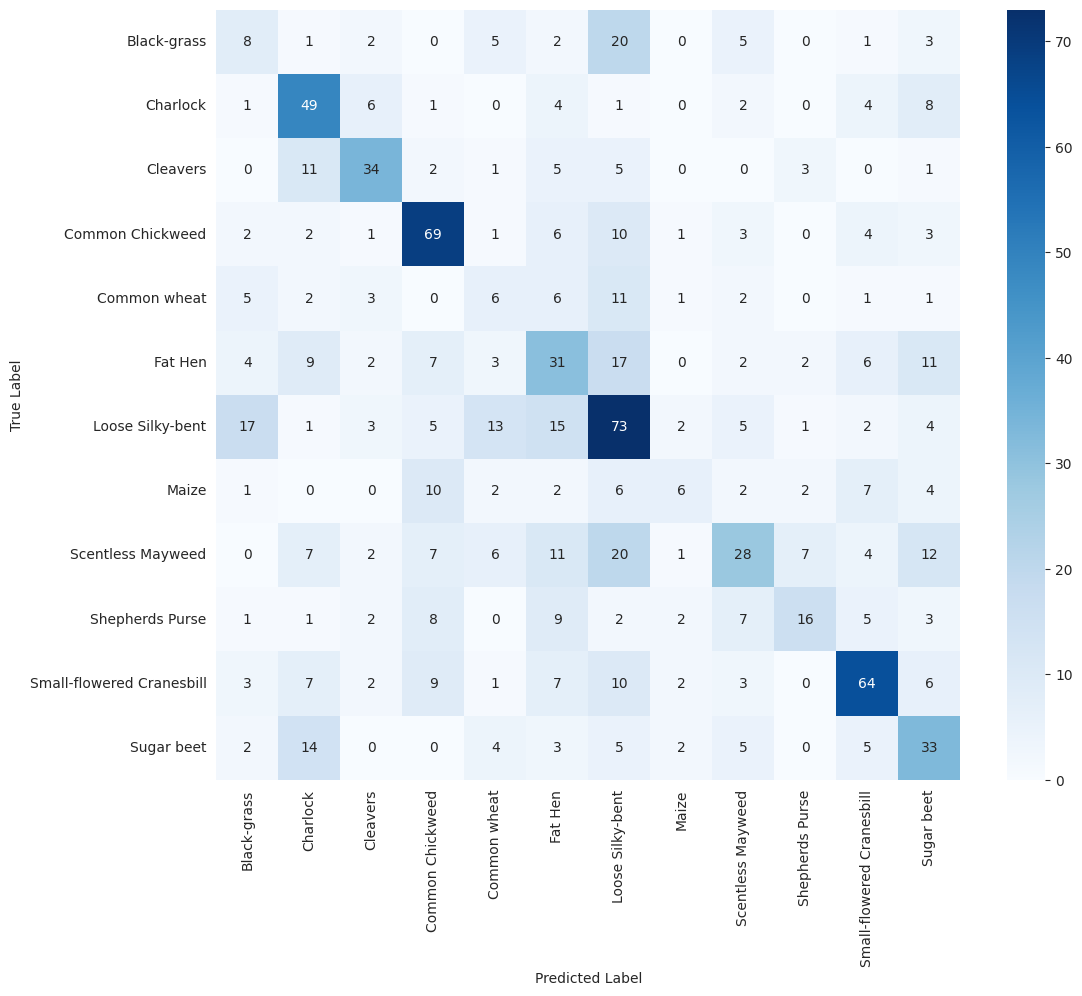

In [18]:
# 1. Build Convolutional Neural Network
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(12, activation='softmax')  # 12 classes for the 12 plant species
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_normalized, y_train_onehot, epochs=50, batch_size=32, validation_data=(X_test_normalized, y_test_onehot), verbose=0)

# 2. Evaluate Model
y_pred = model.predict(X_test_normalized)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test_encoded, y_pred_classes, target_names=label_encoder.classes_))

# 3. Plot Confusion Matrix
confusion_mtx = confusion_matrix(y_test_encoded, y_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [19]:
print(classification_report(y_test_encoded, y_pred_classes, target_names=label_encoder.classes_))

                           precision    recall  f1-score   support

              Black-grass       0.18      0.17      0.18        47
                 Charlock       0.47      0.64      0.54        76
                 Cleavers       0.60      0.55      0.57        62
         Common Chickweed       0.58      0.68      0.63       102
             Common wheat       0.14      0.16      0.15        38
                  Fat Hen       0.31      0.33      0.32        94
         Loose Silky-bent       0.41      0.52      0.45       141
                    Maize       0.35      0.14      0.20        42
        Scentless Mayweed       0.44      0.27      0.33       105
          Shepherds Purse       0.52      0.29      0.37        56
Small-flowered Cranesbill       0.62      0.56      0.59       114
               Sugar beet       0.37      0.45      0.41        73

                 accuracy                           0.44       950
                macro avg       0.42      0.40      0.40    

## Model Evaluation Results:

### **Performance Metrics Overview:**
- **Overall Accuracy:** The model achieves an accuracy of 44%. This means that out of all test images, the model predicts the correct class for 44% of them.

### **Key Observations:**

- The highest F1-Score is for "Charlock" at 61%, suggesting the model performs best for this class.
- The model also shows strong performance for "Small-flowered Cranesbill" with an F1-Score of 55%.
- Classes like "Black-grass", "Common wheat", and "Shepherds Purse" have low F1-scores, indicating challenges in classifying these plants accurately.
- The `macro avg` values provide an average of the metrics across classes. With a macro-average of 38% for both precision and recall, there's room for model improvement.
- The `weighted avg` considers class imbalances. With weighted average values slightly higher than the macro average, the model performs a bit better on more frequent classes.



## Model Performance Improvement

Epoch 1/50
119/119 - 6s - loss: 2.3760 - accuracy: 0.1708 - val_loss: 2.2533 - val_accuracy: 0.2221 - 6s/epoch - 52ms/step
Epoch 2/50
119/119 - 5s - loss: 2.2161 - accuracy: 0.2468 - val_loss: 2.0834 - val_accuracy: 0.2905 - 5s/epoch - 39ms/step
Epoch 3/50
119/119 - 5s - loss: 2.1126 - accuracy: 0.2905 - val_loss: 2.0148 - val_accuracy: 0.3295 - 5s/epoch - 40ms/step
Epoch 4/50
119/119 - 5s - loss: 2.0681 - accuracy: 0.2982 - val_loss: 1.9818 - val_accuracy: 0.3400 - 5s/epoch - 39ms/step
Epoch 5/50
119/119 - 5s - loss: 1.9757 - accuracy: 0.3461 - val_loss: 2.1021 - val_accuracy: 0.2958 - 5s/epoch - 39ms/step
Epoch 6/50
119/119 - 5s - loss: 1.9580 - accuracy: 0.3397 - val_loss: 2.1663 - val_accuracy: 0.2958 - 5s/epoch - 39ms/step
Epoch 7/50
119/119 - 5s - loss: 1.9267 - accuracy: 0.3529 - val_loss: 1.9703 - val_accuracy: 0.3389 - 5s/epoch - 39ms/step
Epoch 8/50
119/119 - 5s - loss: 1.8796 - accuracy: 0.3668 - val_loss: 2.2206 - val_accuracy: 0.3000 - 5s/epoch - 39ms/step
Epoch 9/50
119/1

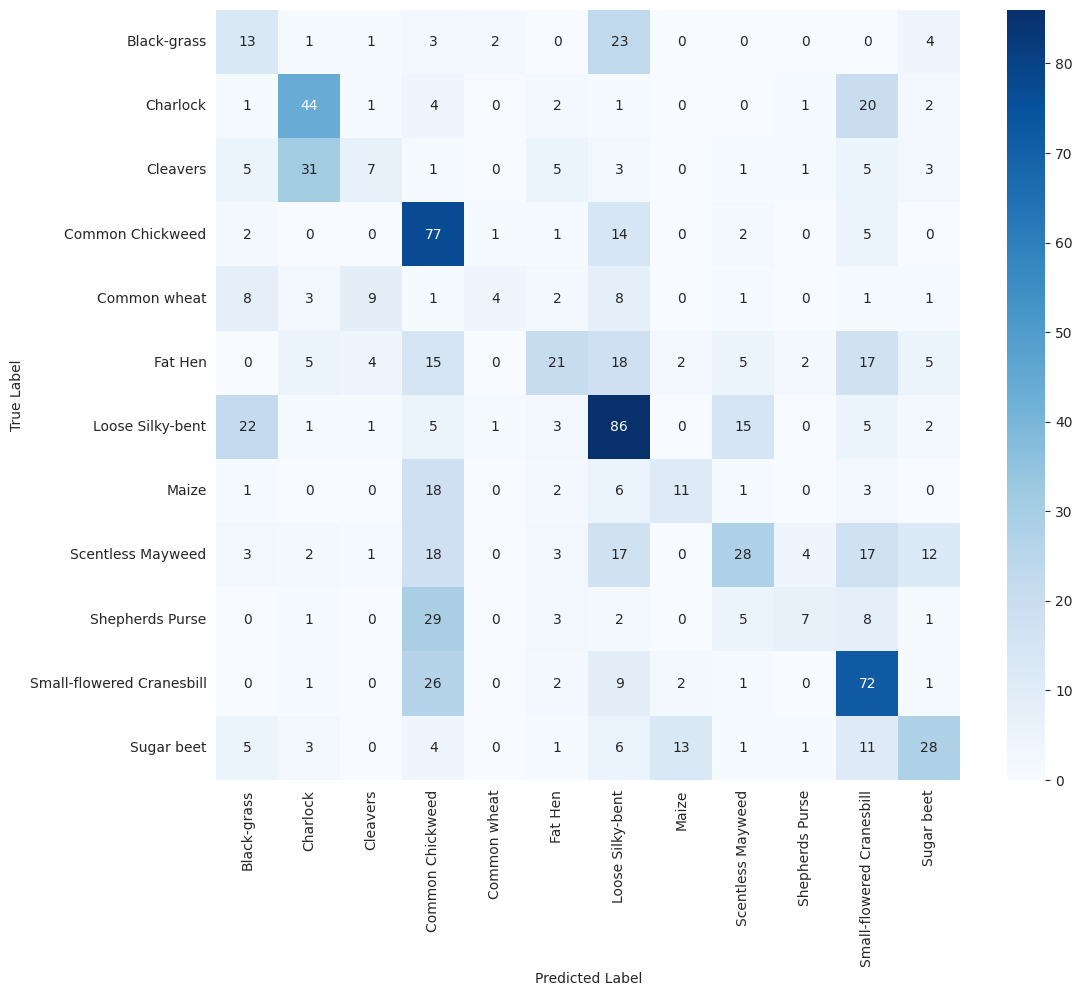

In [20]:
# 1. Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(12, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model using data augmentation
history = model.fit(datagen.flow(X_train_normalized, y_train_onehot, batch_size=32),
                    epochs=50,
                    validation_data=(X_test_normalized, y_test_onehot),
                    verbose=2)

# 2. Evaluate Model
y_pred = model.predict(X_test_normalized)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test_encoded, y_pred_classes, target_names=label_encoder.classes_))

# 3. Plot Confusion Matrix
confusion_mtx = confusion_matrix(y_test_encoded, y_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [21]:
print(classification_report(y_test_encoded, y_pred_classes, target_names=label_encoder.classes_))

                           precision    recall  f1-score   support

              Black-grass       0.22      0.28      0.24        47
                 Charlock       0.48      0.58      0.52        76
                 Cleavers       0.29      0.11      0.16        62
         Common Chickweed       0.38      0.75      0.51       102
             Common wheat       0.50      0.11      0.17        38
                  Fat Hen       0.47      0.22      0.30        94
         Loose Silky-bent       0.45      0.61      0.51       141
                    Maize       0.39      0.26      0.31        42
        Scentless Mayweed       0.47      0.27      0.34       105
          Shepherds Purse       0.44      0.12      0.19        56
Small-flowered Cranesbill       0.44      0.63      0.52       114
               Sugar beet       0.47      0.38      0.42        73

                 accuracy                           0.42       950
                macro avg       0.42      0.36      0.35    

In [22]:
# 1. Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(12, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train the model, including the ReduceLROnPlateau callback
history = model.fit(
    X_train_normalized, y_train_onehot,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_normalized, y_test_onehot),
    callbacks=[reduce_lr],
    verbose=2
)

Epoch 1/50
119/119 - 2s - loss: 2.4468 - accuracy: 0.1258 - val_loss: 2.4588 - val_accuracy: 0.1484 - lr: 0.0010 - 2s/epoch - 17ms/step
Epoch 2/50
119/119 - 1s - loss: 2.4164 - accuracy: 0.1376 - val_loss: 2.4212 - val_accuracy: 0.1316 - lr: 0.0010 - 530ms/epoch - 4ms/step
Epoch 3/50
119/119 - 1s - loss: 2.3479 - accuracy: 0.1797 - val_loss: 2.3393 - val_accuracy: 0.1821 - lr: 0.0010 - 527ms/epoch - 4ms/step
Epoch 4/50
119/119 - 1s - loss: 2.0348 - accuracy: 0.3171 - val_loss: 1.9560 - val_accuracy: 0.3484 - lr: 0.0010 - 524ms/epoch - 4ms/step
Epoch 5/50
119/119 - 1s - loss: 1.8828 - accuracy: 0.3739 - val_loss: 1.8995 - val_accuracy: 0.3042 - lr: 0.0010 - 524ms/epoch - 4ms/step
Epoch 6/50
119/119 - 1s - loss: 1.7676 - accuracy: 0.3989 - val_loss: 1.8848 - val_accuracy: 0.3453 - lr: 0.0010 - 527ms/epoch - 4ms/step
Epoch 7/50
119/119 - 1s - loss: 1.6775 - accuracy: 0.4274 - val_loss: 1.7988 - val_accuracy: 0.3821 - lr: 0.0010 - 524ms/epoch - 4ms/step
Epoch 8/50
119/119 - 1s - loss: 1.55

30/30 [==============================] - 0s 2ms/step
                           precision    recall  f1-score   support

              Black-grass       0.25      0.40      0.31        47
                 Charlock       0.45      0.64      0.53        76
                 Cleavers       0.70      0.31      0.43        62
         Common Chickweed       0.57      0.70      0.63       102
             Common wheat       0.09      0.05      0.07        38
                  Fat Hen       0.34      0.29      0.31        94
         Loose Silky-bent       0.42      0.46      0.44       141
                    Maize       0.53      0.24      0.33        42
        Scentless Mayweed       0.38      0.35      0.36       105
          Shepherds Purse       0.30      0.30      0.30        56
Small-flowered Cranesbill       0.61      0.53      0.56       114
               Sugar beet       0.36      0.41      0.38        73

                 accuracy                           0.43       950
       

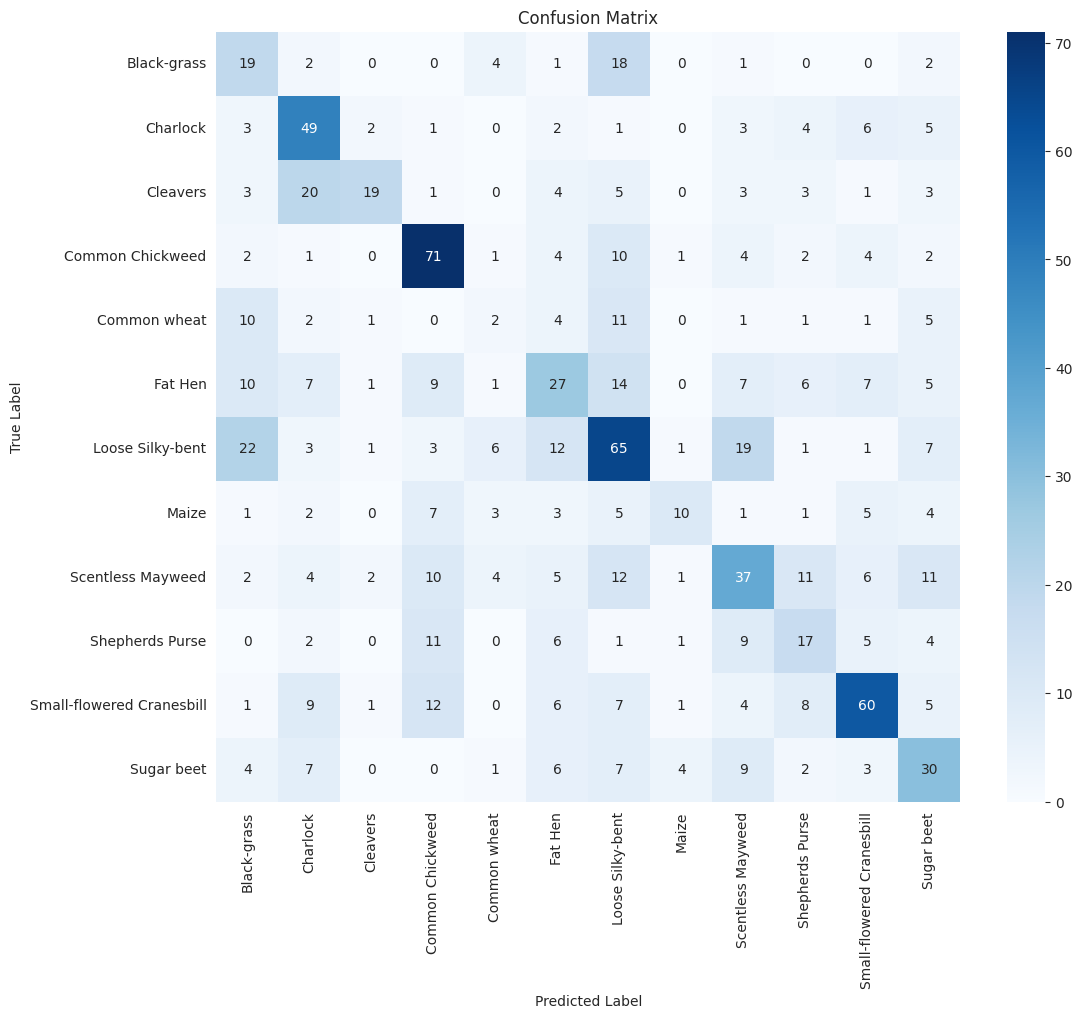

In [23]:
# Predict classes on test data
y_pred = model.predict(X_test_normalized)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_test_encoded, y_pred_classes, target_names=label_encoder.classes_))

# Plot Confusion Matrix
confusion_mtx = confusion_matrix(y_test_encoded, y_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Confusion Matrix")
plt.show()

**Reducing the Learning Rate:**

**Hint**: Use **ReduceLRonPlateau()** function that will be used to decrease the learning rate by some factor, if the loss is not decreasing for some time. This may start decreasing the loss at a smaller learning rate. There is a possibility that the loss may still not decrease. This may lead to executing the learning rate reduction again in an attempt to achieve a lower loss.

### **Data Augmentation**

Remember, **data augmentation should not be used in the validation/test data set**.

In [24]:
# 1. Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(12, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train the model using data augmentation, and include the ReduceLROnPlateau callback
history = model.fit(
    datagen.flow(X_train_normalized, y_train_onehot, batch_size=32),  # Augmented data
    epochs=50,
    validation_data=(X_test_normalized, y_test_onehot),  # No augmentation on validation data
    callbacks=[reduce_lr],
    verbose=2
)


Epoch 1/50
119/119 - 6s - loss: 2.3936 - accuracy: 0.1626 - val_loss: 2.3163 - val_accuracy: 0.2242 - lr: 0.0010 - 6s/epoch - 53ms/step
Epoch 2/50
119/119 - 5s - loss: 2.2192 - accuracy: 0.2439 - val_loss: 2.2101 - val_accuracy: 0.2242 - lr: 0.0010 - 5s/epoch - 40ms/step
Epoch 3/50
119/119 - 5s - loss: 2.1246 - accuracy: 0.2900 - val_loss: 2.0046 - val_accuracy: 0.3253 - lr: 0.0010 - 5s/epoch - 40ms/step
Epoch 4/50
119/119 - 5s - loss: 2.0498 - accuracy: 0.3161 - val_loss: 2.3831 - val_accuracy: 0.2368 - lr: 0.0010 - 5s/epoch - 43ms/step
Epoch 5/50
119/119 - 5s - loss: 2.0043 - accuracy: 0.3300 - val_loss: 1.9293 - val_accuracy: 0.3358 - lr: 0.0010 - 5s/epoch - 41ms/step
Epoch 6/50
119/119 - 5s - loss: 1.9591 - accuracy: 0.3542 - val_loss: 2.0354 - val_accuracy: 0.3253 - lr: 0.0010 - 5s/epoch - 40ms/step
Epoch 7/50
119/119 - 5s - loss: 1.9044 - accuracy: 0.3608 - val_loss: 1.9189 - val_accuracy: 0.3358 - lr: 0.0010 - 5s/epoch - 43ms/step
Epoch 8/50
119/119 - 5s - loss: 1.8888 - accurac

30/30 [==============================] - 0s 2ms/step
                           precision    recall  f1-score   support

              Black-grass       0.26      0.26      0.26        47
                 Charlock       0.40      0.63      0.49        76
                 Cleavers       0.31      0.15      0.20        62
         Common Chickweed       0.42      0.83      0.56       102
             Common wheat       0.31      0.11      0.16        38
                  Fat Hen       0.40      0.33      0.36        94
         Loose Silky-bent       0.47      0.38      0.42       141
                    Maize       0.48      0.33      0.39        42
        Scentless Mayweed       0.49      0.18      0.26       105
          Shepherds Purse       0.33      0.32      0.32        56
Small-flowered Cranesbill       0.41      0.63      0.50       114
               Sugar beet       0.46      0.30      0.36        73

                 accuracy                           0.41       950
       

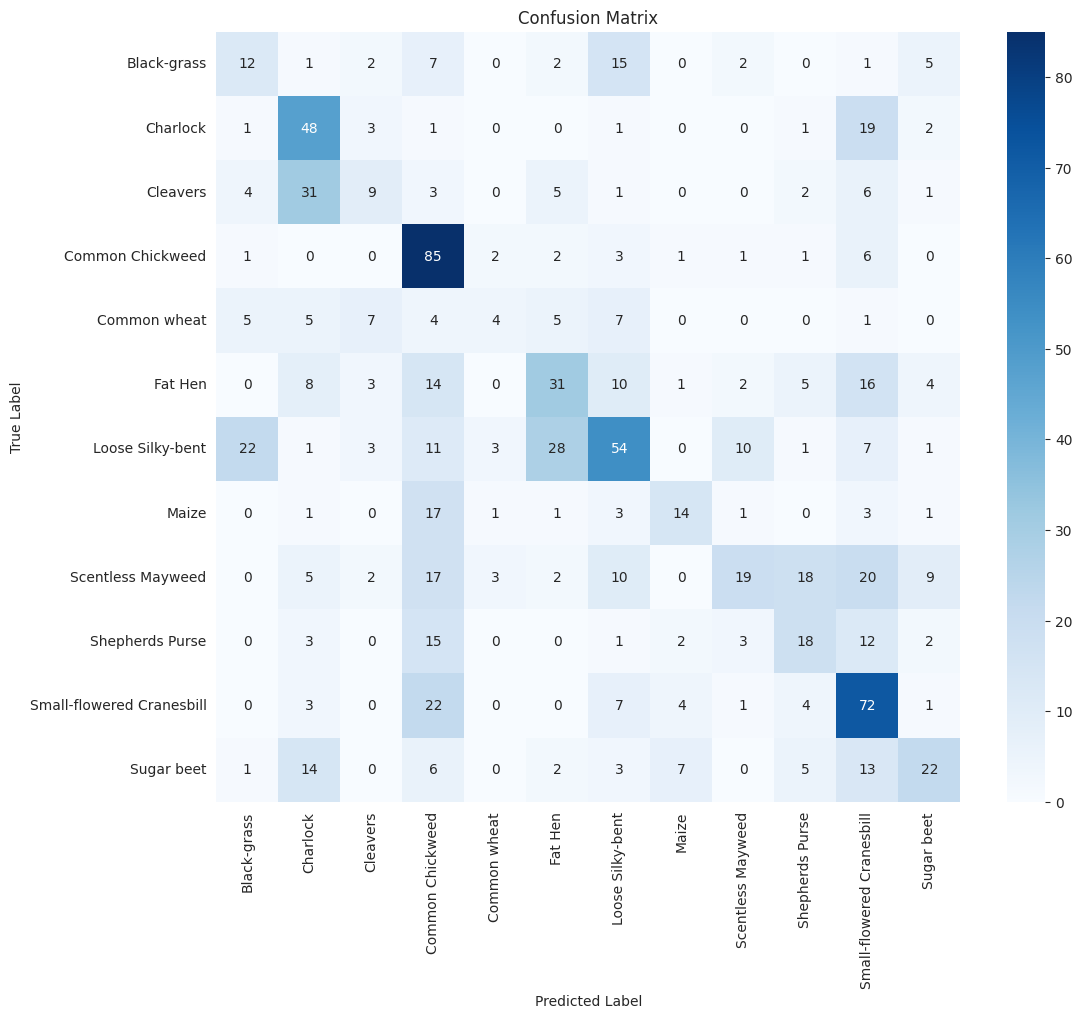

In [25]:
# Predict classes on test data
y_pred = model.predict(X_test_normalized)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(y_test_encoded, y_pred_classes, target_names=label_encoder.classes_))

# Plot Confusion Matrix
confusion_mtx = confusion_matrix(y_test_encoded, y_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Confusion Matrix")
plt.show()

In [26]:
# Generate the confusion matrix
conf_mtx = confusion_matrix(y_test_encoded, y_pred_classes)

# Print the matrix
print(conf_mtx)


[[12  1  2  7  0  2 15  0  2  0  1  5]
 [ 1 48  3  1  0  0  1  0  0  1 19  2]
 [ 4 31  9  3  0  5  1  0  0  2  6  1]
 [ 1  0  0 85  2  2  3  1  1  1  6  0]
 [ 5  5  7  4  4  5  7  0  0  0  1  0]
 [ 0  8  3 14  0 31 10  1  2  5 16  4]
 [22  1  3 11  3 28 54  0 10  1  7  1]
 [ 0  1  0 17  1  1  3 14  1  0  3  1]
 [ 0  5  2 17  3  2 10  0 19 18 20  9]
 [ 0  3  0 15  0  0  1  2  3 18 12  2]
 [ 0  3  0 22  0  0  7  4  1  4 72  1]
 [ 1 14  0  6  0  2  3  7  0  5 13 22]]


In [27]:
sorted_unique_labels = sorted(labels_df['Label'].unique())
print(sorted_unique_labels)

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']


###Testing models LNW

In [28]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import BatchNormalization

# Enhanced Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=45,  # Random rotations from 0-45 degrees
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2,  # Random vertical shifts
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Random horizontal flips
    vertical_flip=True,  # Random vertical flips
    fill_mode='reflect',  # Reflect the pixels when shifting outside the borders
    brightness_range=[0.8,1.2]  # Vary brightness between 80% and 120% of original
)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min')
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1, mode='min', min_lr=0.00001)

# Model Architecture with Batch Normalization
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(12, activation='softmax')  # Assuming 12 classes for the 12 plant species
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model using data augmentation
history = model.fit(
    datagen.flow(X_train_normalized, y_train_onehot, batch_size=32),
    epochs=50,
    validation_data=(X_test_normalized, y_test_onehot),
    verbose=2,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/50
119/119 - 9s - loss: 2.5643 - accuracy: 0.1150 - val_loss: 22.9879 - val_accuracy: 0.0411 - lr: 0.0010 - 9s/epoch - 77ms/step
Epoch 2/50
119/119 - 6s - loss: 2.5861 - accuracy: 0.1089 - val_loss: 229.9342 - val_accuracy: 0.0653 - lr: 0.0010 - 6s/epoch - 52ms/step
Epoch 3/50
119/119 - 6s - loss: 2.5214 - accuracy: 0.1116 - val_loss: 1955.2040 - val_accuracy: 0.0653 - lr: 0.0010 - 6s/epoch - 52ms/step
Epoch 4/50
119/119 - 7s - loss: 2.4884 - accuracy: 0.1145 - val_loss: 10162.9150 - val_accuracy: 0.0653 - lr: 0.0010 - 7s/epoch - 55ms/step
Epoch 5/50
119/119 - 6s - loss: 2.4810 - accuracy: 0.1179 - val_loss: 46522.7461 - val_accuracy: 0.0653 - lr: 0.0010 - 6s/epoch - 52ms/step
Epoch 6/50

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
119/119 - 6s - loss: 2.4642 - accuracy: 0.1255 - val_loss: 84658.5312 - val_accuracy: 0.1200 - lr: 0.0010 - 6s/epoch - 52ms/step
Epoch 7/50
119/119 - 6s - loss: 2.4456 - accuracy: 0.1247 - val_loss: 140539.1719 - val_

## Final Model

Comment on the final model you have selected and use the same in the below code to visualize the image.

### Visualizing the prediction

## Actionable Insights and Business Recommendations

*

_____